<div align="center">

# <b>FaceDancer: Pose- and Occlusion-Aware High Fidelity Face Swapping</b>

[![arXiv](https://img.shields.io/badge/arXiv-Paper-<COLOR>.svg)](https://arxiv.org/abs/2210.10473) [![License: CC BY-NC-SA 4.0](https://img.shields.io/badge/License-CC%20BY--NC--SA%204.0-lightgrey.svg)](https://creativecommons.org/licenses/by-nc-sa/4.0/)  [![GitHub Stars](https://img.shields.io/github/stars/felixrosberg/FaceDancer?affiliations=OWNER&color=green&style=social)](https://github.com/felixrosberg/FaceDancer) ![visitors](https://visitor-badge.laobi.icu/badge?page_id=felixrosberg/FaceDancer) [![Hugging Face](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/felixrosberg/face-swap)
</div>

Github: https://github.com/felixrosberg/FaceDancer

HugginFace: https://huggingface.co/spaces/felixrosberg/face-swap

## 1. 📋 Install requirements

In [ ]:
# 1.1
%cd /content
!rm -rf FaceDancer &> /dev/null
!git clone https://github.com/felixrosberg/FaceDancer.git
!cd FaceDancer && git pull

In [ ]:
# 1.2
%cd /content/FaceDancer

!pip install -q tensorflow
!pip install -q -r requirements.txt
!pip install -q --upgrade moviepy

%reload_ext autoreload
%autoreload

In [ ]:
# 1.3
%cd /content/FaceDancer

!wget -q --show-progress -P ./arcface_model https://huggingface.co/felixrosberg/ArcFace/resolve/main/ArcFace-Res50.h5
!wget -q --show-progress -P ./retinaface https://huggingface.co/felixrosberg/RetinaFace/resolve/main/RetinaFace-Res50.h5

# 2. 📋 Apply models from Google drive

You need to upload the downloaded pretrained FaceDancer model from HugginFace (`FaceDancer_config_c_HQ.h5` or others) to your Google Drive. 
 - Download a pretrained model weights from [here](https://huggingface.co/felixrosberg/FaceDancer).
 - Create **model_zoo** folder in the root of Gdrive and upload the models into it. it should look something like this:

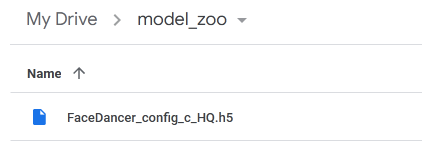


In [ ]:
# 2.1 Mount your Gdrive
%cd /content

from google.colab import drive
drive.mount('/content/drive')

## 🚀 Inference

In [ ]:
%cd /content/FaceDancer
# Upload your source face with this cell or manually. File will be upload in FaceDancer dir

from google.colab import files

uploaded = files.upload()

In [ ]:
%cd /content/FaceDancer
# Upload your target video or image with this cell or manually. File will be upload in FaceDancer dir

from google.colab import files

uploaded = files.upload()

In [ ]:
%cd /content/FaceDancer
# Video processing

# facedancer_path - path to pretrained model on your Google drive
# vid_path - path to target video. Change it to your path of the target video
# swap_source - path to source face. Change it to your path of the source face

facedancer_path = '/content/drive/MyDrive/model_zoo/FaceDancer_config_c_HQ.h5'

vid_path = '/content/FaceDancer/video.mp4'
swap_source = '/content/FaceDancer/face.jpg'
vid_output = '/content/FaceDancer/swapped_video.mp4'

!python -W ignore test_video_swap_multi.py --vid_path {vid_path} --swap_source {swap_source} --facedancer_path {facedancer_path} --vid_output {vid_output}

In [ ]:
%cd /content/FaceDancer
# Image processing

# facedancer_path - path to pretrained model on your Google drive
# img_path - path to target image. Change it to your path of uploaded files
# swap_source - path to source face. Change it to your path of uploaded files

facedancer_path = '/content/drive/MyDrive/model_zoo/FaceDancer_config_c_HQ.h5'

swap_source = '/content/FaceDancer/image.jpg'
img_path = '/content/FaceDancer/face.jpg'
img_output = '/content/FaceDancer/swapped_image.jpg'

!python -W ignore test_image_swap_multi.py --img_path {img_path} --swap_source {swap_source} --facedancer_path {facedancer_path} --img_output {img_output}